# 需要分析的问题
    1.各个地区的评价人数
    2.各种评价的占比
    3.不同时间段给出的评价

In [44]:
import os
import pandas
from pyecharts.charts import Bar, Pie, Line
from pyecharts import options as opts

path = os.getcwd() + '/流浪地球.csv'
data = pandas.read_csv(path)

In [40]:
print(data.head())

  Unnamed: 0     name city                                            content  \
0          0       影志   北京  电影比预期要更恢弘磅礴，晨昏线过后的永夜、火种计划、让地球流浪、木星推动地球…等等大小设定，...   
1          1      陆支羽   北京  5.0。1.终于，轮到我们仰望星空。2.后启示录死亡废墟，赛博朋克地下城，以及烟波浩渺的末日...   
2          2       掉线   北京  【C+】大刘故事打底，想象力已经赢了。特效值得夸，冰天雪地覆盖的北京上海，木星地球引力对撞的...   
3          3    嘟嘟熊之父   北京  还能更土更儿戏一点吗？毫无思考仅靠煽动，毫无敬畏仅余妄想。好的科幻片应该首先承认人类的无知，...   
4          4  木子Lily李       大量说话口型对不上，后期配音？地下城场景迷你，在酒吧搭的棚？起码有两个镜头连不上，中间剪掉了...   

  score        date  
0    推荐  2019-02-04  
1    力荐  2019-01-29  
2    推荐  2019-01-20  
3    很差  2019-01-28  
4    很差  2019-01-29  


# 各个地区的评价人数

In [41]:
province = '湖南,湖北,广东,广西、河南、河北、山东、山西,江苏、浙江、江西、黑龙江、新疆,云南、贵州、福建、吉林、安徽,四川、西藏、宁夏、辽宁、青海、甘肃、陕西,内蒙古、台湾,海南,北京'
province = province.replace('、', ',').split(',')

arrage = [0 for i in range(40)]
city_dict = dict(zip(province, arrage))
print(city_dict)

{'湖南': 0, '湖北': 0, '广东': 0, '广西': 0, '河南': 0, '河北': 0, '山东': 0, '山西': 0, '江苏': 0, '浙江': 0, '江西': 0, '黑龙江': 0, '新疆': 0, '云南': 0, '贵州': 0, '福建': 0, '吉林': 0, '安徽': 0, '四川': 0, '西藏': 0, '宁夏': 0, '辽宁': 0, '青海': 0, '甘肃': 0, '陕西': 0, '内蒙古': 0, '台湾': 0, '海南': 0, '北京': 0}


In [42]:
for each_city in data['city']:
    if type(each_city) == str:
        for each_pro in province:
            if each_pro in each_city:
                city_dict[each_pro] += 1
                break
print(city_dict)

{'湖南': 2, '湖北': 0, '广东': 20, '广西': 2, '河南': 0, '河北': 0, '山东': 2, '山西': 2, '江苏': 7, '浙江': 10, '江西': 2, '黑龙江': 0, '新疆': 0, '云南': 0, '贵州': 0, '福建': 0, '吉林': 0, '安徽': 2, '四川': 7, '西藏': 0, '宁夏': 0, '辽宁': 0, '青海': 2, '甘肃': 0, '陕西': 2, '内蒙古': 0, '台湾': 0, '海南': 0, '北京': 115}


In [43]:
temp = city_dict.copy()
for key in temp.keys():
    if city_dict[key] == 0:
        city_dict.pop(key)
print(city_dict)

{'湖南': 2, '广东': 20, '广西': 2, '山东': 2, '山西': 2, '江苏': 7, '浙江': 10, '江西': 2, '安徽': 2, '四川': 7, '青海': 2, '陕西': 2, '北京': 115}


In [22]:
city_data = [each for each in city_dict.items()]
city_list = [each for each in city_dict.keys()]
bar = Bar()
bar.add_xaxis(city_list)
bar.add_yaxis('城市', city_data)
bar.set_global_opts(title_opts=opts.TitleOpts(title='评论来源排行'),
                    xaxis_opts=opts.AxisOpts(axislabel_opts={"rotate": 45}))

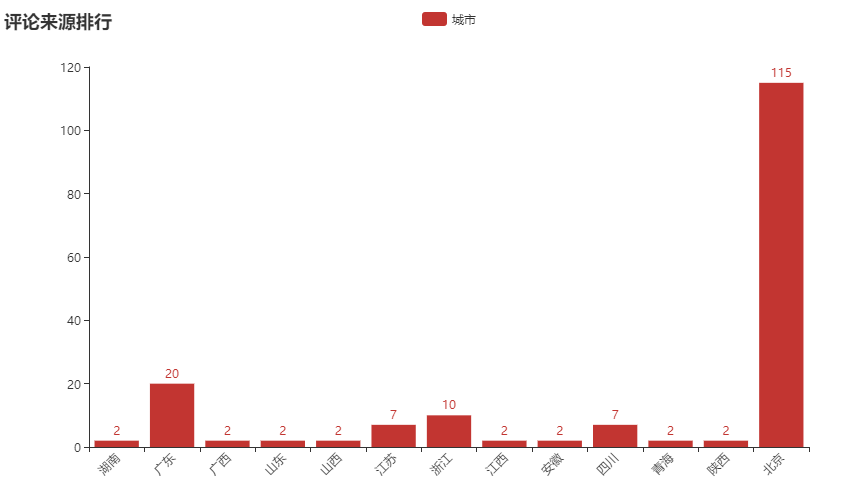

# 各种评价的占比

In [23]:
province = ['力荐', '推荐', '还行', '较差', '很差']
arrage = [0 for each in range(5)]

eval_dict = dict(zip(province, arrage))
print(eval_dict)

{'力荐': 0, '推荐': 0, '还行': 0, '较差': 0, '很差': 0}


In [24]:
for each_eval in data['score']:
    if type(each_eval) == str:
        for each_pro in province:
            if each_pro in each_eval:
                eval_dict[each_pro] += 1
                break
print(eval_dict)

{'力荐': 86, '推荐': 90, '还行': 60, '较差': 53, '很差': 99}


In [25]:
count_list = [each for each in eval_dict.values()]
pie = Pie()
pie.add('', [list(eva) for eva in zip(province, count_list)], radius=['30%', '75%'], rosetype="radius")
pie.set_global_opts(title_opts=opts.TitleOpts(title='饼状图', subtitle='评价饼状图'))
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))

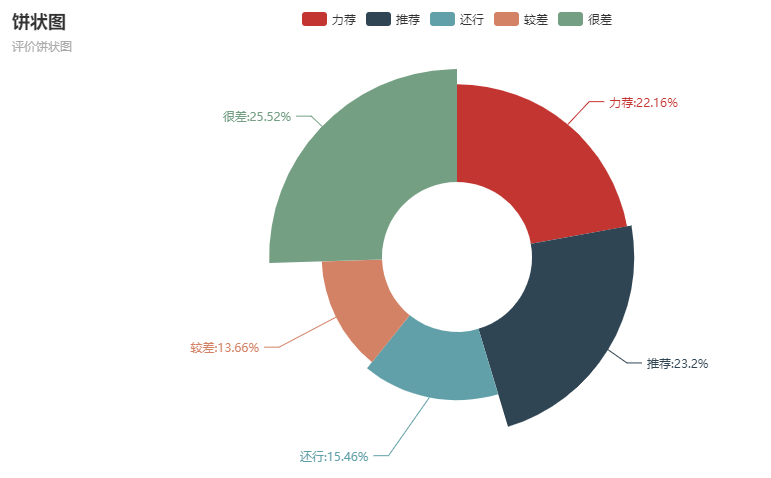

# 不同时间段给出的评价

In [35]:
score_list = ['力荐', '推荐', '还行', '较差', '很差']
province = {'力荐': 0, '推荐': 0, '还行': 0, '较差': 0, '很差': 0}
all_data = {}
a = data[['score', 'date']]
date = a['date']
score = a['score']
date_list = list(zip(score, date))
for each_data in date_list:
    if each_data[1] not in all_data and type(each_data[0] == str) and type(each_data[1]) == str:
        temp_score = province.copy()
        for each_score in score_list:
            if each_data[0] == each_score:
                temp_score[each_score] += 1
                all_data[each_data[1]] = temp_score
                break
    elif each_data[1] in all_data and type(each_data[0] == str) and type(each_data[1]) == str:
        for each_score in score_list:
            if each_data[0] == each_score:
                all_data[each_data[1]][each_score] += 1
                break
for key,value in all_data.items():
    print(key, value)

2019-02-04 {'力荐': 1, '推荐': 5, '还行': 0, '较差': 0, '很差': 2}
2019-01-29 {'力荐': 7, '推荐': 4, '还行': 8, '较差': 2, '很差': 1}
2019-01-20 {'力荐': 13, '推荐': 11, '还行': 0, '较差': 2, '很差': 0}
2019-01-28 {'力荐': 4, '推荐': 24, '还行': 9, '较差': 2, '很差': 1}
2019-02-05 {'力荐': 47, '推荐': 37, '还行': 43, '较差': 41, '很差': 67}
2019-01-27 {'力荐': 2, '推荐': 1, '还行': 0, '较差': 0, '很差': 0}
2019-02-02 {'力荐': 0, '推荐': 2, '还行': 0, '较差': 0, '很差': 0}
2019-01-22 {'力荐': 2, '推荐': 0, '还行': 0, '较差': 0, '很差': 0}
2019-01-12 {'力荐': 0, '推荐': 0, '还行': 0, '较差': 2, '很差': 0}
2019-02-06 {'力荐': 8, '推荐': 6, '还行': 0, '较差': 4, '很差': 28}
2019-01-21 {'力荐': 2, '推荐': 0, '还行': 0, '较差': 0, '很差': 0}


对各个时间点评价的分数进行写入

In [37]:
date_list = sorted(all_data)
for each in date_list:
    print(each, all_data[each])

2019-01-12 {'力荐': 0, '推荐': 0, '还行': 0, '较差': 2, '很差': 0}
2019-01-20 {'力荐': 13, '推荐': 11, '还行': 0, '较差': 2, '很差': 0}
2019-01-21 {'力荐': 2, '推荐': 0, '还行': 0, '较差': 0, '很差': 0}
2019-01-22 {'力荐': 2, '推荐': 0, '还行': 0, '较差': 0, '很差': 0}
2019-01-27 {'力荐': 2, '推荐': 1, '还行': 0, '较差': 0, '很差': 0}
2019-01-28 {'力荐': 4, '推荐': 24, '还行': 9, '较差': 2, '很差': 1}
2019-01-29 {'力荐': 7, '推荐': 4, '还行': 8, '较差': 2, '很差': 1}
2019-02-02 {'力荐': 0, '推荐': 2, '还行': 0, '较差': 0, '很差': 0}
2019-02-04 {'力荐': 1, '推荐': 5, '还行': 0, '较差': 0, '很差': 2}
2019-02-05 {'力荐': 47, '推荐': 37, '还行': 43, '较差': 41, '很差': 67}
2019-02-06 {'力荐': 8, '推荐': 6, '还行': 0, '较差': 4, '很差': 28}


对时间进行排序输出

In [38]:
data1 = []
data2 = []
data3 = []
data4 = []
data5 = []

for each_date in date_list:
    data1.append(all_data[each_date]['力荐'])
    data2.append(all_data[each_date]['推荐'])
    data3.append(all_data[each_date]['还行'])
    data4.append(all_data[each_date]['较差'])
    data5.append(all_data[each_date]['很差'])

line = Line()
line.add_xaxis(date_list)
line.add_yaxis('力荐', data1)
line.add_yaxis('推荐', data2)
line.add_yaxis('还行', data3)
line.add_yaxis('较差', data4)
line.add_yaxis('很差', data5)
line.set_global_opts(title_opts=opts.TitleOpts(title="折线图", subtitle='时间评价折线图'))

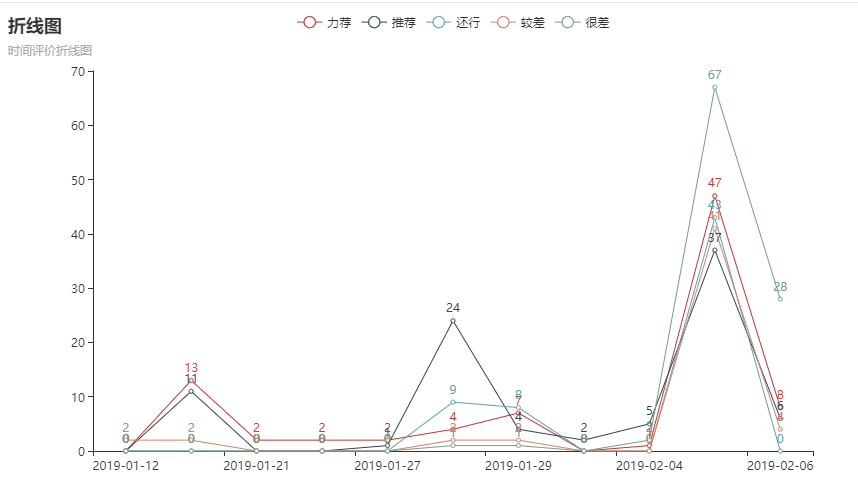

对数据进行输出